In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import dvc.api
import pandas as pd
import matplotlib as plt

In [4]:
import os
import sys
sys.path.append('.')
sys.path.insert(1, '../script/')
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import numpy as np
from logger import Logger

In [6]:
data_file = '/store_train_data.csv'

# the local data path
local_path = '../sales-data/' + data_file

# the path to the data set
path = 'sales-data/' + data_file

# base repository
repo = '../'

In [7]:
version = 'v1'

# data path using dvc api
data_url = dvc.api.get_url(path = path, repo = repo, rev = version)

# reading the csv file
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']
df = pd.read_csv(data_url, na_values=missing_values)
df

,Unnamed: 0,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [8]:
df['Store'].nunique()

1115

In [9]:
df['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   StoreType                  1017209 non-null  object 
 3   Assortment                 1017209 non-null  object 
 4   CompetitionDistance        1014567 non-null  float64
 5   CompetitionOpenSinceMonth  693861 non-null   float64
 6   CompetitionOpenSinceYear   693861 non-null   float64
 7   Promo2                     1017209 non-null  int64  
 8   Promo2SinceWeek            509178 non-null   float64
 9   Promo2SinceYear            509178 non-null   float64
 10  PromoInterval              509178 non-null   object 
 11  DayOfWeek                  1017209 non-null  int64  
 12  Date                       1017209 non-null  object 
 13  Sales       

In [11]:
df['Unnamed: 0'].nunique()

1017209

In [12]:
#we drop the Unnamed: 0 column since it has no functionality.
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.sample(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
82031,90,a,a,330.0,11.0,2007.0,0,NaN,NaN,NaN,6,2013-06-22,6766,975,1,0,0,0
192351,213,d,c,4030.0,3.0,2014.0,1,1.0,2014.0,"Jan,Apr,Jul,Oct",3,2015-01-21,6258,558,1,0,0,0


In [13]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [42]:
df.set_index('Date', inplace=True)

In [43]:
df.to_csv('../data/train_data.csv', index=True)

Data preprocessing

After we merge our store and train files together in a dataframe then we start to look for the outliers and missing values.

In [14]:
print(f'shape: {df.shape}, size: {df.size}')

shape: (1017209, 18), size: 18309762


In [15]:
df.duplicated().value_counts()

False    1017209
dtype: int64

In [16]:
df.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

As we can see we have values which, are replaced by boolean value of True on CompetitionDistance, CompetitionOpenSinceMonth, 
CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval columns.

In [17]:
df.isnull().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
dtype: bool

In [18]:
print(df['Date'])

0          2015-07-31
1          2015-07-30
2          2015-07-29
3          2015-07-28
4          2015-07-27
              ...    
1017204    2013-01-05
1017205    2013-01-04
1017206    2013-01-03
1017207    2013-01-02
1017208    2013-01-01
Name: Date, Length: 1017209, dtype: object


In [19]:
# separate the Date column to year, month, and day
df[['year', 'month', 'day']] = df['Date'].str.split('-', expand=True)
# display the dataframe
df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-31,5263,555,1,1,0,1,2015,07,31
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-30,5020,546,1,1,0,1,2015,07,30
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-29,4782,523,1,1,0,1,2015,07,29
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-28,5011,560,1,1,0,1,2015,07,28
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2015-07-27,6102,612,1,1,0,1,2015,07,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-05,4771,339,1,0,0,1,2013,01,05
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-04,4540,326,1,0,0,1,2013,01,04
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-03,4297,300,1,0,0,1,2013,01,03
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-02,3697,305,1,0,0,1,2013,01,02


In [20]:
sales_df = df['Sales']
sales_df.head()

0    5263
1    5020
2    4782
3    5011
4    6102
Name: Sales, dtype: int64

<AxesSubplot:>

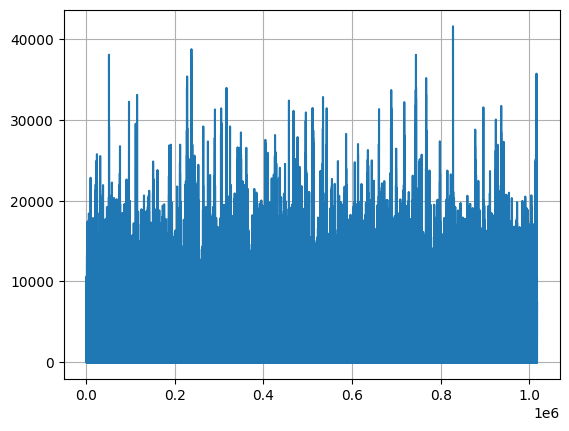

In [21]:
sales_df.plot(grid=True)

In [22]:
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].bfill()

In [23]:
df['Promo2SinceYear'] = df['Promo2SinceYear'].bfill()

In [24]:
df['PromoInterval'] = df['PromoInterval'].bfill()

In [25]:
df.head(100)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
0,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",...,2015-07-31,5263,555,1,1,0,1,2015,07,31
1,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",...,2015-07-30,5020,546,1,1,0,1,2015,07,30
2,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",...,2015-07-29,4782,523,1,1,0,1,2015,07,29
3,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",...,2015-07-28,5011,560,1,1,0,1,2015,07,28
4,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",...,2015-07-27,6102,612,1,1,0,1,2015,07,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",...,2015-04-27,5575,574,1,1,0,0,2015,04,27
96,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",...,2015-04-26,0,0,0,0,0,0,2015,04,26
97,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",...,2015-04-25,4318,537,1,0,0,0,2015,04,25
98,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",...,2015-04-24,3198,437,1,0,0,0,2015,04,24


In [26]:
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].ffill()
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].ffill()

filling missing values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear using ffill method

In [27]:
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.014567e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.430086e+03,7.230954e+00,2.008581e+03,5.005638e-01,2.382813e+01,2.011749e+03,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,7.715324e+03,3.187480e+00,6.631930e+00,4.999999e-01,1.420533e+01,1.684496e+00,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,7.100000e+02,4.000000e+00,2.006000e+03,0.000000e+00,1.300000e+01,2.011000e+03,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,2.330000e+03,7.000000e+00,2.010000e+03,1.000000e+00,2.200000e+01,2.012000e+03,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.890000e+03,1.000000e+01,2.012000e+03,1.000000e+00,3.700000e+01,2.013000e+03,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


filling the missing value of CompetitionDistance using it min value

In [28]:
df['CompetitionDistance'] = df['CompetitionDistance'].min()

In [29]:
df.isnull().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
year                         False
month                        False
day                          False
dtype: bool

In [30]:
date_df = df.set_index('Date', inplace=False)
date_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,5263,555,1,1,0,1,2015,07,31
2015-07-30,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,5020,546,1,1,0,1,2015,07,30
2015-07-29,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,4782,523,1,1,0,1,2015,07,29
2015-07-28,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,5011,560,1,1,0,1,2015,07,28
2015-07-27,1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,6102,612,1,1,0,1,2015,07,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,1115,d,c,20.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,4771,339,1,0,0,1,2013,01,05
2013-01-04,1115,d,c,20.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,4540,326,1,0,0,1,2013,01,04
2013-01-03,1115,d,c,20.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,4297,300,1,0,0,1,2013,01,03


In [31]:
date_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1017209.0,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,20.0,7.230954e+00,2.008581e+03,5.005638e-01,2.382813e+01,2.011749e+03,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,0.0,3.187480e+00,6.631930e+00,4.999999e-01,1.420533e+01,1.684496e+00,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,20.0,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,20.0,4.000000e+00,2.006000e+03,0.000000e+00,1.300000e+01,2.011000e+03,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,20.0,7.000000e+00,2.010000e+03,1.000000e+00,2.200000e+01,2.012000e+03,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,20.0,1.000000e+01,2.012000e+03,1.000000e+00,3.700000e+01,2.013000e+03,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,20.0,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [32]:
compare_sales = date_df[['Sales', 'SchoolHoliday', 'StateHoliday']].groupby('Sales')

In [33]:
first_30_stores = date_df.loc['2015-07-31'][0:30]

In [34]:
scores = first_30_stores.drop(columns = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear'])
scores

,Store,StoreType,Assortment,Promo2,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
Date,,,,,,,,,,,,,,,
2015-07-31,1,c,a,0,"Jan,Apr,Jul,Oct",5,5263,555,1,1,0,1,2015,07,31
2015-07-31,2,a,a,1,"Jan,Apr,Jul,Oct",5,6064,625,1,1,0,1,2015,07,31
2015-07-31,3,a,a,1,"Jan,Apr,Jul,Oct",5,8314,821,1,1,0,1,2015,07,31
2015-07-31,4,c,c,0,"Jan,Apr,Jul,Oct",5,13995,1498,1,1,0,1,2015,07,31
2015-07-31,5,a,a,0,"Jan,Apr,Jul,Oct",5,4822,559,1,1,0,1,2015,07,31
2015-07-31,6,a,a,0,"Jan,Apr,Jul,Oct",5,5651,589,1,1,0,1,2015,07,31
2015-07-31,7,a,c,0,"Jan,Apr,Jul,Oct",5,15344,1414,1,1,0,1,2015,07,31
2015-07-31,8,a,a,0,"Jan,Apr,Jul,Oct",5,8492,833,1,1,0,1,2015,07,31
2015-07-31,9,a,c,0,"Jan,Apr,Jul,Oct",5,8565,687,1,1,0,1,2015,07,31


<AxesSubplot:xlabel='Date'>

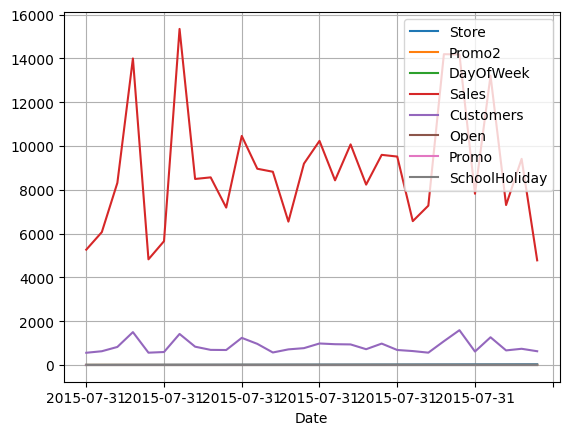

In [35]:
scores.plot(grid=True)

This sales data below is for the first 30 stores for one day 03/07/2015, from this we can see that the sales value varies from store to store in the same day. Stores having Promo2 on that day have much larger sales value than others.

<AxesSubplot:xlabel='Date'>

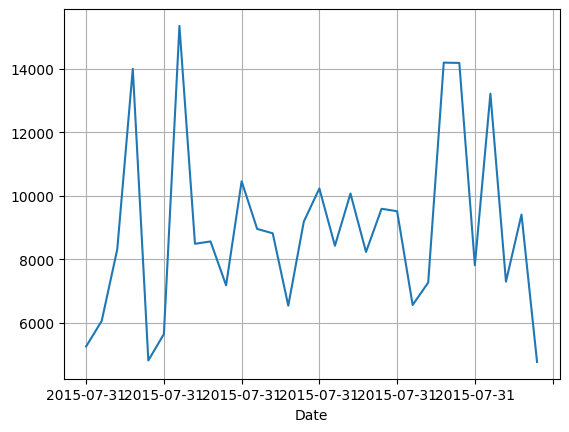

In [36]:
sales_data_2015=first_30_stores['Sales']
sales_data_2015.plot(grid=True)

In [37]:
display = compare_sales.head()
display

,Sales,SchoolHoliday,StateHoliday
Date,,,
2015-07-31,5263,1,0
2015-07-30,5020,1,0
2015-07-29,4782,1,0
2015-07-28,5011,1,0
2015-07-27,6102,1,0
...,...,...,...
2013-01-07,21237,0,0
2013-01-05,18856,0,0
2013-01-04,18371,1,0


In [38]:
seasonal_purchase = date_df[['Sales', 'StateHoliday']].groupby('Sales')
seasonal_purchase.head(10)

,Sales,StateHoliday
Date,,
2015-07-31,5263,0
2015-07-30,5020,0
2015-07-29,4782,0
2015-07-28,5011,0
2015-07-27,6102,0
...,...,...
2013-01-07,21237,0
2013-01-05,18856,0
2013-01-04,18371,0


In [39]:
test_df = pd.read_csv('../data/test.csv')

In [40]:
test_df.drop(['Id'], axis=1, inplace=True)

In [41]:
test_df.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-09-17,1.0,1,0,0
1,3,4,2015-09-17,1.0,1,0,0
2,7,4,2015-09-17,1.0,1,0,0
3,8,4,2015-09-17,1.0,1,0,0
4,9,4,2015-09-17,1.0,1,0,0


In [42]:
test_df['Open'] = test_df['Open'].max() 

In [43]:
test_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [1]:
train_df = pd.read_csv('../data/train.csv')

NameError: name 'pd' is not defined

In [45]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [46]:
train_df.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

Univarite Analysis

In [47]:
store_counts = df['Store'].nunique()
store_counts

1115

Rosemann Pharmasuticals have 1115 stores where there is transaction.

In [48]:
date_counts = df['Date'].nunique()
date_counts

942

In [49]:
counts_df = df['Date'].value_counts()
counts_df

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

In [50]:
promo_counts = df['Promo'].nunique()
promo_counts

2

In [51]:
sales_df = df['Sales'].value_counts()
sales_df

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
19268         1
18344         1
17685         1
19544         1
21237         1
Name: Sales, Length: 21734, dtype: int64

<AxesSubplot:>

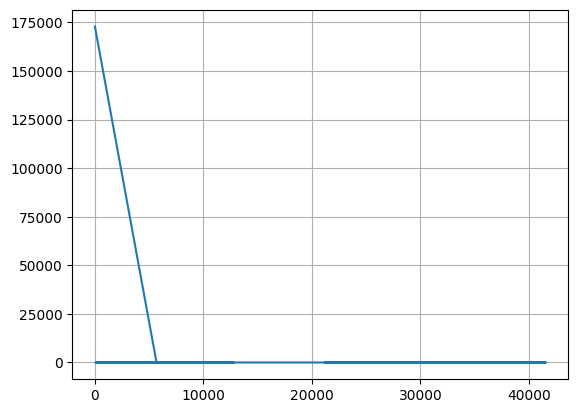

In [52]:
sales_df.plot(grid=True)

In [53]:
sales = df['Sales']
# sales = df[['Sales', 'Store']].groupby('Store')
sales_data = sales.head(31)
sales_data

0     5263
1     5020
2     4782
3     5011
4     6102
5        0
6     4364
7     3706
8     3769
9     3464
10    3558
11    4395
12       0
13    4406
14    4852
15    4427
16    4767
17    5042
18    5054
19       0
20    3530
21    3808
22    3897
23    3797
24    3650
25    4359
26       0
27    4797
28    4665
29    5558
30    5223
Name: Sales, dtype: int64

The plot below show that the sales amount the first stores for one month or 31 days.

<AxesSubplot:>

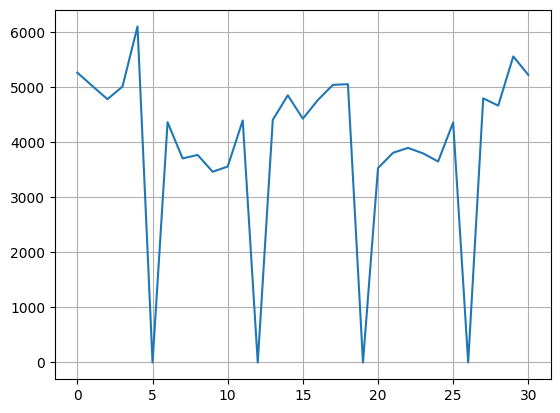

In [54]:
sales_data.plot(grid=True)

In [55]:
holiday_a = date_df['StateHoliday']
holiday_a

Date
2015-07-31    0
2015-07-30    0
2015-07-29    0
2015-07-28    0
2015-07-27    0
             ..
2013-01-05    0
2013-01-04    0
2013-01-03    0
2013-01-02    0
2013-01-01    a
Name: StateHoliday, Length: 1017209, dtype: object

In [56]:
store_df = df.set_index('Store', inplace=False)
store_df

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
Store,,,,,,,,,,,,,,,,,,,,
1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1,2015,07,31
1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1,2015,07,30
1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1,2015,07,29
1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1,2015,07,28
1,c,a,20.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1,2015,07,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,d,c,20.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1,2013,01,05
1115,d,c,20.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1,2013,01,04
1115,d,c,20.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1,2013,01,03


In [57]:
store_open = store_df[['DayOfWeek', 'Open']]
store_open
# store_open = store_df[['Sales', 'DayOfWeek', 'Open']].groupby('StateHoliday')

,DayOfWeek,Open
Store,,
1,5,1
1,4,1
1,3,1
1,2,1
1,1,1
...,...,...
1115,6,1
1115,5,1
1115,4,1


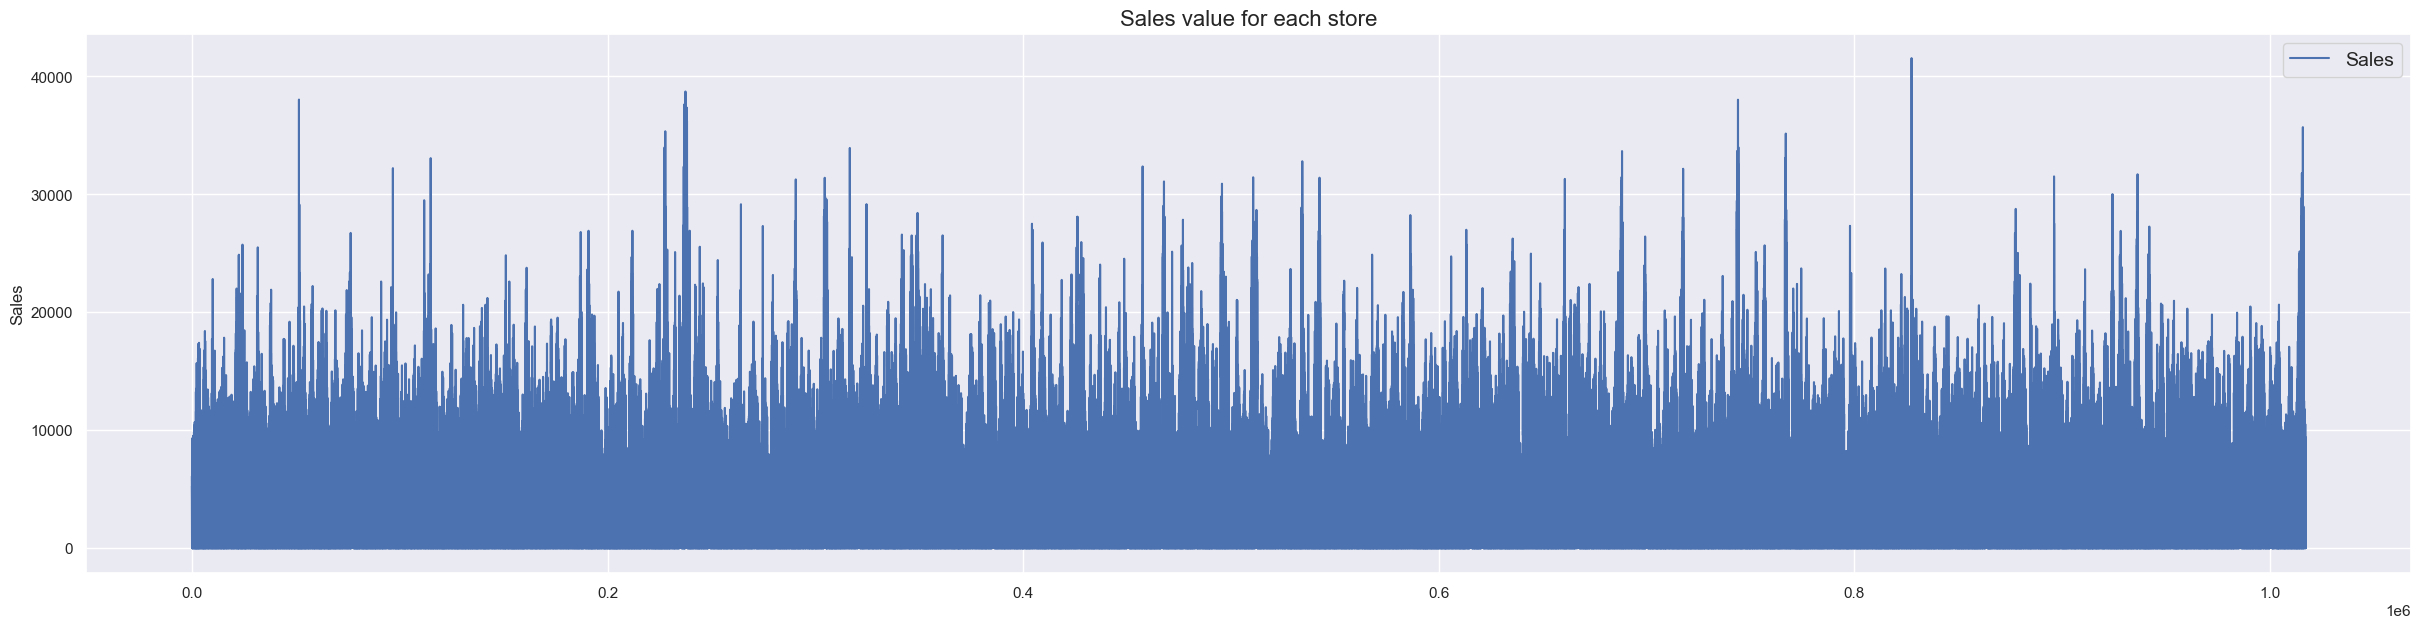

In [58]:
sns.set()
df[['Sales', 'StoreType']].plot(figsize=(30, 7))
plt.ylabel("Sales")
plt.title("Sales value for each store", fontsize=16)
plt.legend(fontsize=14);

In [59]:
 def plot_subplots(x: str, y: str, xtitle: str, ytitle: str) -> None:
        """Plot the subplots of the data.
        Args:
            df(pd.DataFrame): Dataframe to be plotted.
            title(str): title of chart.
        """
        sns.set(style="whitegrid")
        fig, axes = plt.subplots(nrows=1, ncols=2)
        fig.set_size_inches(25, 8)
        x.hist(ax=axes[0], alpha=0.3, color='red', bins=20)
        y.hist(ax=axes[1], alpha=0.3, color='blue', bins=20)
        axes[0].set_title(xtitle, size=20)
        axes[1].set_title(ytitle, size=20)
        # self.logger.info(
        #     'Plotting a subplots')
        plt.show()

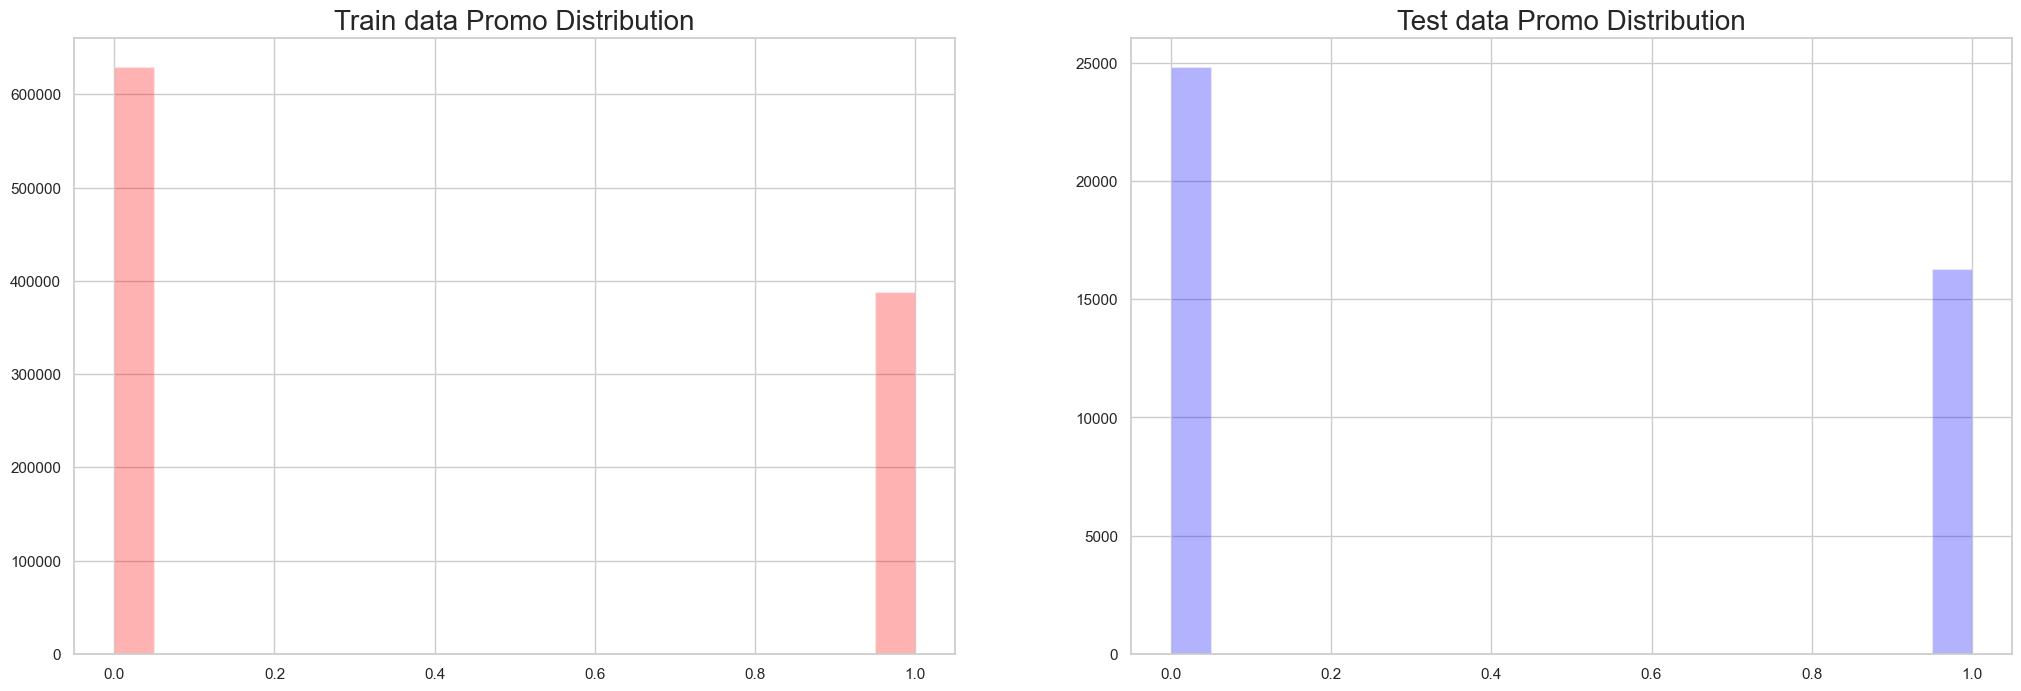

In [60]:
plot_subplots(train_df['Promo'], test_df['Promo'], 'Train data Promo Distribution', 'Test data Promo Distribution')

In [61]:
 def plot_hist_all(df):
        """Plot all features in Histogram."""
        sns.set()
        num_feats = list(df.select_dtypes(
            include=['int64', 'float64', 'int32']).columns)
        # self.logger.info("Plotting multiple histogram")
        df[num_feats].hist(figsize=(20, 15))

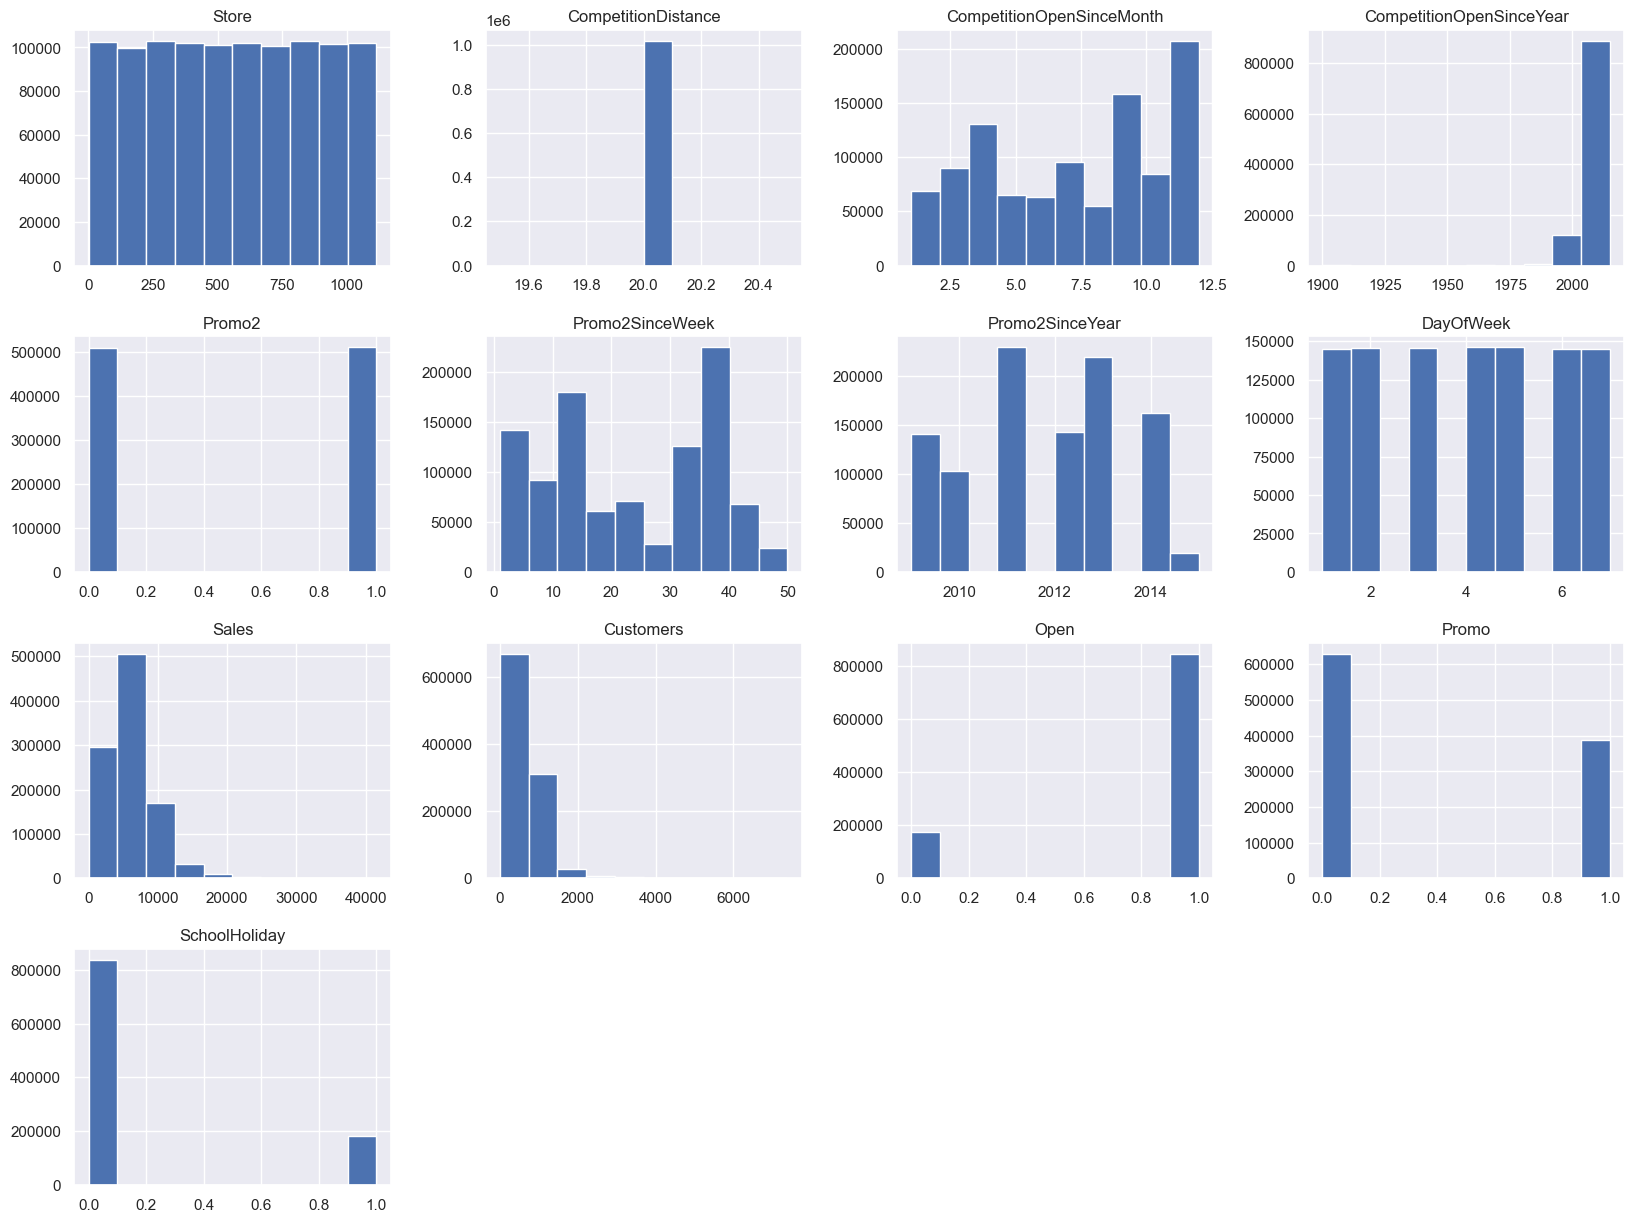

In [62]:
plot_hist_all(df)

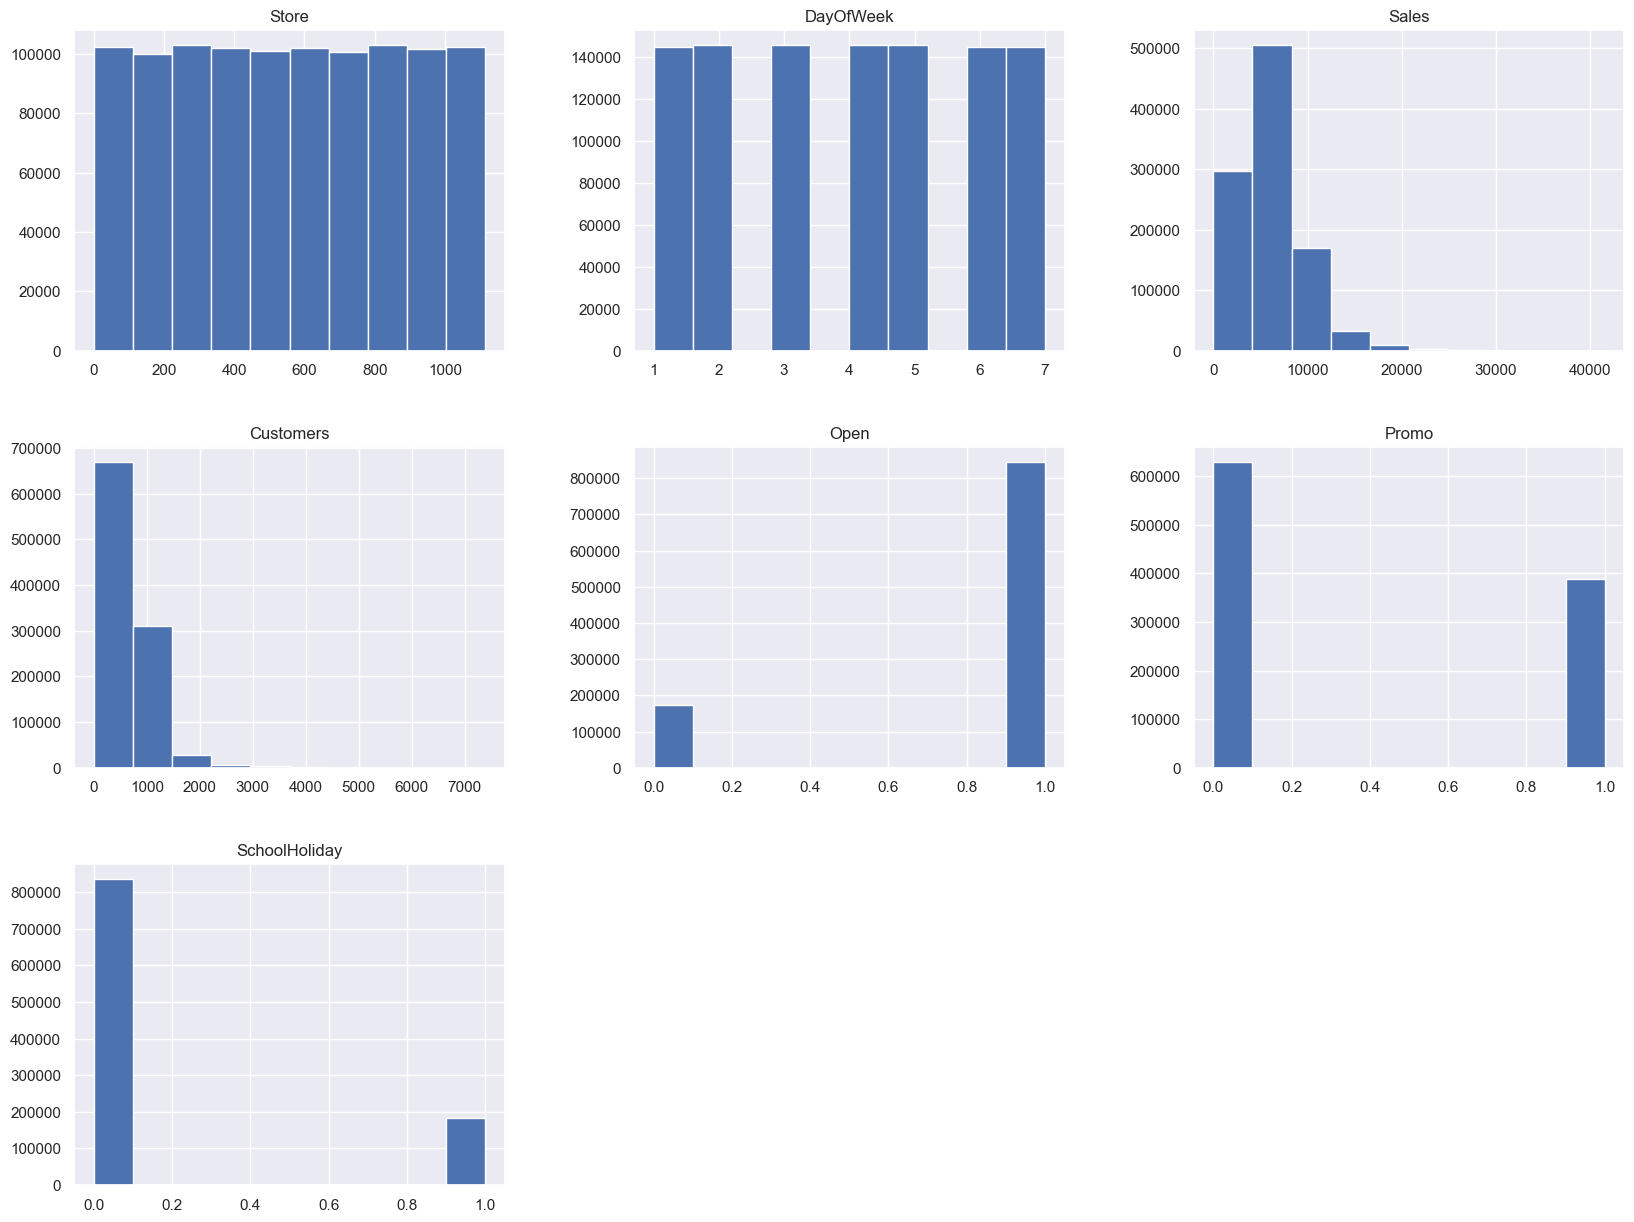

In [63]:
plot_hist_all(train_df)

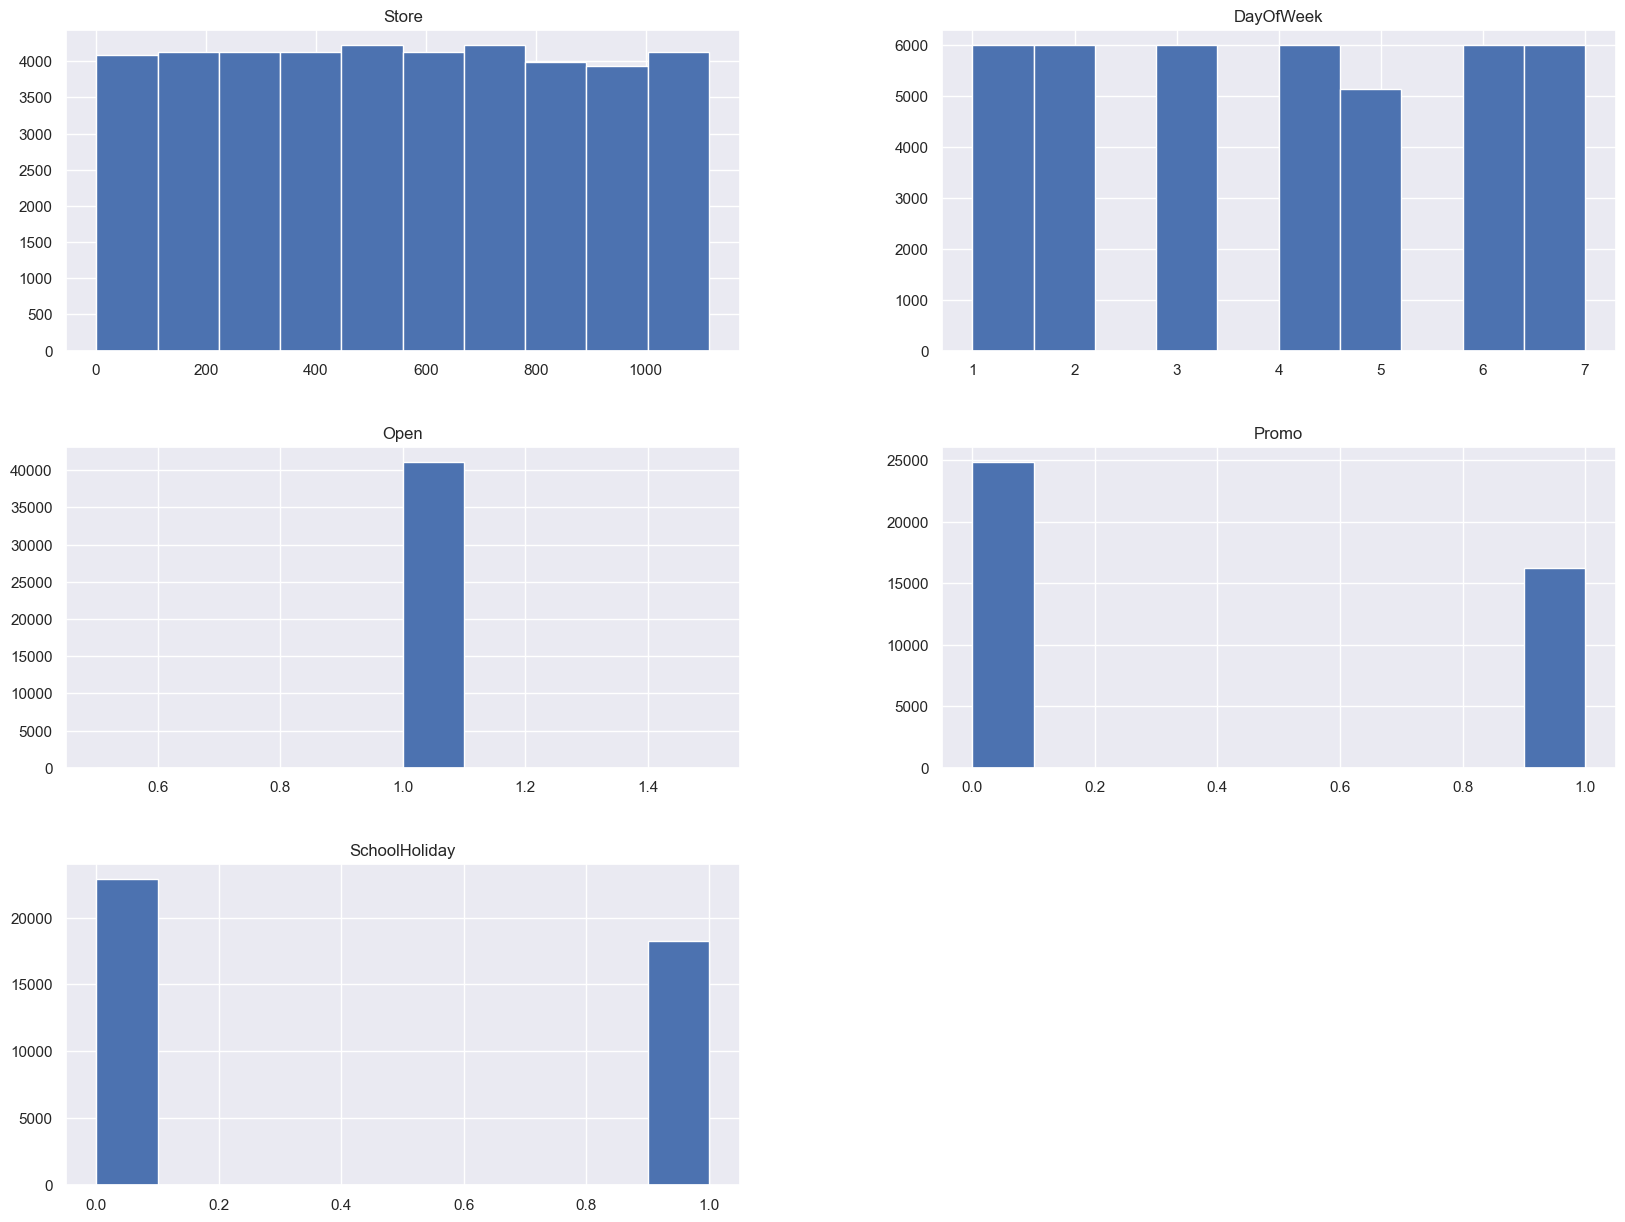

In [64]:
plot_hist_all(test_df)

In [65]:
holiday_df = df.groupby(['StateHoliday'])['Sales'].mean().reset_index()

In [66]:
holiday_df.replace({'StateHoliday': {'0': 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}}, inplace=True)

In [67]:
 def plot_bar(df: pd.DataFrame, x_col: str, y_col: str, title: str, xlabel: str, ylabel: str) -> None:
        """Plot bar of the column.
        Args:
            df(pd.DataFrame): Dataframe to be plotted.
            x_col(str): column to be plotted.
        """
        plt.figure(figsize=(12, 7))
        sns.barplot(data=df, x=x_col, y=y_col)
        plt.title(title, size=20)
        plt.xticks(rotation=75, fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)
        # self.logger.info(
        #     'Plotting a bar chart')
        plt.show()

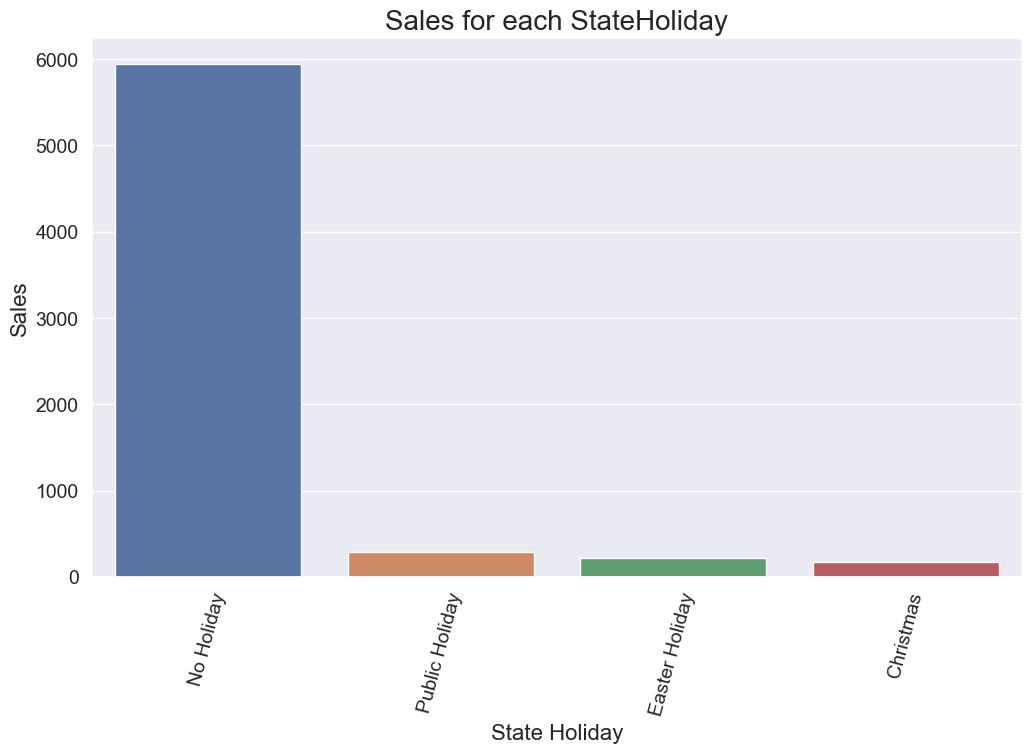

In [68]:
plot_bar(holiday_df, 'StateHoliday', 'Sales', 'Sales for each StateHoliday', 'State Holiday', 'Sales')

In [69]:
  def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
        """Plot Scatter chart of the data.
        Args:
            df(pd.DataFrame): Dataframe to be plotted.
            column(str): column to be plotted.
        """
        logger = Logger("../logs/plotting_by_scatter.log").get_app_logger()
        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue, style=style)
        plt.title(title, size=20)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        logger.info(
            'Plotting a scatter plot')
        plt.show()

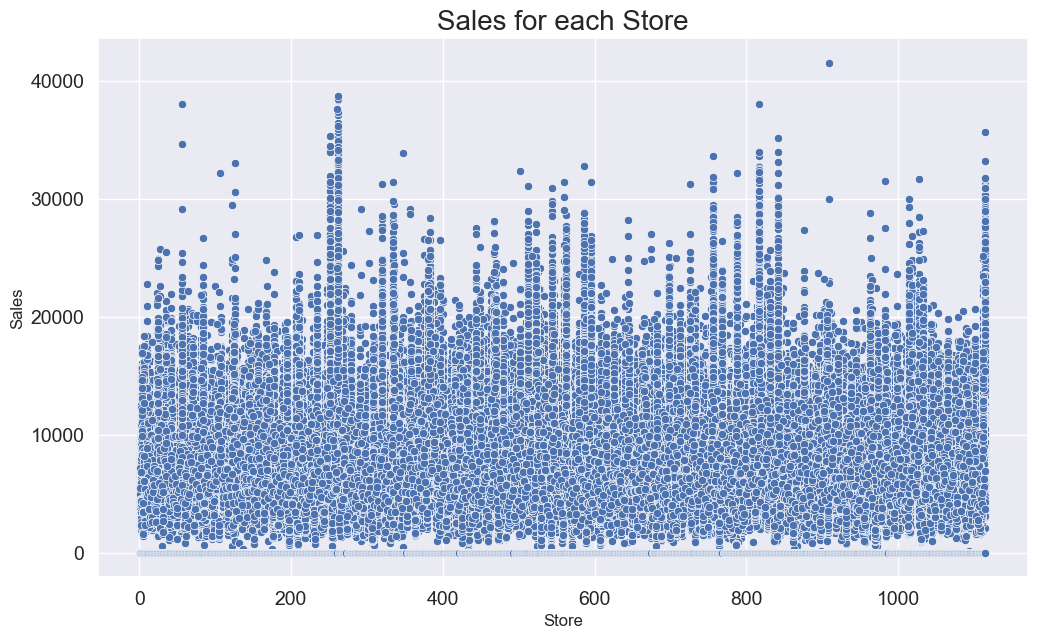

In [70]:
plot_scatter(train_df, train_df['Store'], train_df['Sales'], 'Sales for each Store', None, None)

In [71]:
def sc_matrix(df: pd.DataFrame, title: str) -> None:
        """Plot the scatter matrix of the data.
        Args:
            df(pd.DataFrame): Dataframe to be plotted.
            title(str): title of chart.
        """
        plt.figure(figsize=(12, 7))
        sns.pairplot(df)
        plt.title(title, size=20)
        # self.logger.info(
        #     'Plotting a scatter matrix')
#         scatter_matrix(df, alpha=0.2, figsize=(12, 7), diagonal='kde')

<Figure size 1200x700 with 0 Axes>

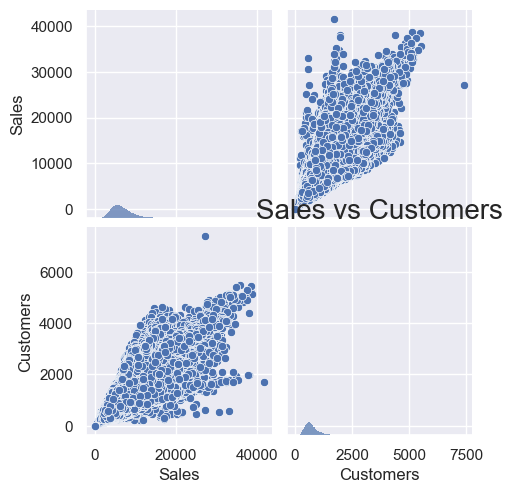

In [77]:
attributes = ["Sales", "Customers"]
sales_vs_customer = sc_matrix(train_df[attributes], "Sales vs Customers")

[]

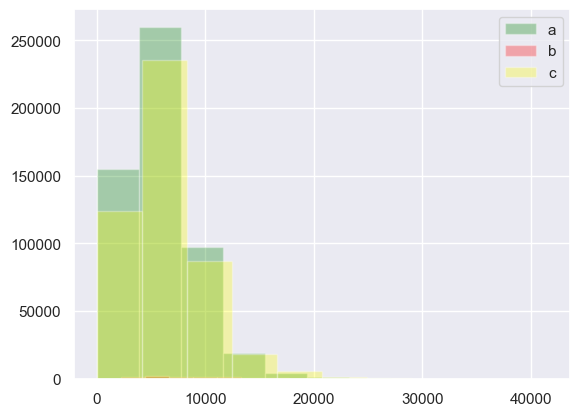

In [73]:
sns.set()
plt.hist(df[df['Assortment'] == 'a'].Sales, color='green', alpha=0.3, label = 'a')
plt.hist(df[df['Assortment'] == 'b'].Sales, color='red', alpha=0.3, label = 'b')
plt.hist(df[df['Assortment'] == 'c'].Sales, color='yellow', alpha=0.3, label = 'c')
plt.legend()
plt.plot()

as we can see Assortment a stores has high sales, b has the lowest

In [74]:
def plot_hist_2d(df1: pd.DataFrame, df2: pd.DataFrame, x_col: str, y_col: str, title: str, label1, label2) -> None:
        """Plot multiple histograms of the data.
        Args:
            df(pd.DataFrame): Dataframe to be plotted.
            x_col(str): column to be plotted.
        """
        sns.set()
        plt.hist(df1[x_col], color='black', alpha=0.3, label=label1)
        plt.hist(df2[y_col], color='red', alpha=0.3, label=label2)
        plt.legend()
        plt.plot()
        plt.title(title, size=20)
        # self.logger.info(
        #     'Plotting multiple histogram')
        plt.show()

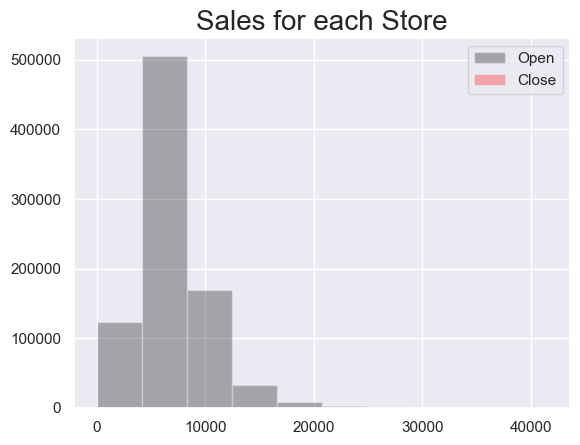

In [76]:
sales_plot = plot_hist_2d(train_df[train_df['Open'] == 1], train_df[train_df['Open'] == 0], 'Sales', 'Sales', 'Sales for each Store', 'Open', 'Close')

In [86]:
with open("result.txt", "w") as report:
    report.write(f"The sales for each store is: \n  {sales_plot}")
    report.write(f"Relationship between sales and customer is described as:\n {sales_vs_customer}")